<a href="https://colab.research.google.com/github/nattapongbam/229352-StatisticalLearning681/blob/main/Copy_of_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [4]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [5]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

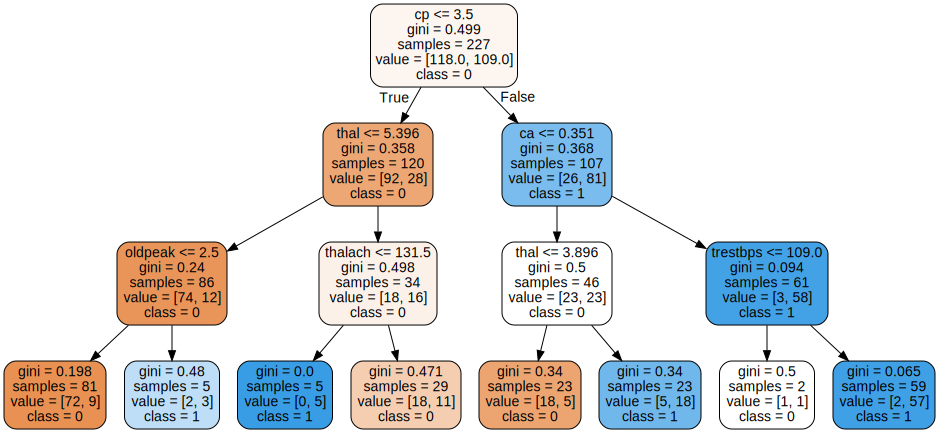

In [12]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [15]:
from sklearn.metrics import classification_report

ypred = gridcv.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        46
           1       0.83      0.67      0.74        30

    accuracy                           0.82        76
   macro avg       0.82      0.79      0.80        76
weighted avg       0.82      0.82      0.81        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [13]:
clf_d = DecisionTreeClassifier()
bagged_tree = BaggingClassifier(clf_d, n_estimators=100, max_samples=X_train.shape[0], max_features=5)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=5,
                  max_samples=227, n_estimators=100)

In [16]:
ypred = bagged_tree.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        46
           1       0.79      0.87      0.83        30

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [17]:
clf_r = RandomForestClassifier(n_estimators=200)
clf_r.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [18]:
ypred_r = clf_r.predict(X_test)
print(classification_report(y_test, ypred_r))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        46
           1       0.82      0.90      0.86        30

    accuracy                           0.88        76
   macro avg       0.87      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [20]:
tree = DecisionTreeClassifier()
params_1 = {'max_depth': [3, 6, 9, 12], 'max_features': [2, 3, 5], 'min_samples_leaf' : [1, 2, 3, 5]}

gridcv = GridSearchCV(tree, params_1, scoring='accuracy', cv=3)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12], 'max_features': [2, 3, 5],
                         'min_samples_leaf': [1, 2, 3, 5]},
             scoring='accuracy')

In [22]:
y_pred1 = gridcv.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        46
           1       0.74      0.77      0.75        30

    accuracy                           0.80        76
   macro avg       0.79      0.80      0.79        76
weighted avg       0.80      0.80      0.80        76



In [37]:
print(gridcv.best_estimator_)

DecisionTreeClassifier(max_depth=6, max_features=2, min_samples_leaf=3)


# Hyperparameters of the best model that chosen are max_depth, max_feature and min_sample_leaf


# Best model for decision tree are max_depth=6, max_features=2, min_samples_leaf=3

In [30]:
bagged_tree = BaggingClassifier(tree)
params_2 = {'n_estimators': [100, 200, 300], 'max_features': [3, 5, 7], 'max_samples' : [15, 20, 30, 35]}

gridcv2 = GridSearchCV(bagged_tree, params_2, scoring='accuracy', cv=3)
gridcv2.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'max_features': [3, 5, 7],
                         'max_samples': [15, 20, 30, 35],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [32]:
y_pred2 = gridcv2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        46
           1       0.89      0.80      0.84        30

    accuracy                           0.88        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.88      0.88        76



In [31]:
print(gridcv2.best_estimator_)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=3,
                  max_samples=15, n_estimators=300)


# Hyperparameters of the best model that chosen are max_feature, min_sample_leaf and n_estimators


# Best model for bagged decision tree are max_features=3,max_samples=15, n_estimators=300

In [38]:
random_forest = RandomForestClassifier()
params_3 = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 7, 9], 'max_features': [2, 3, 5, 7]}

gridcv3 = GridSearchCV(random_forest, params_3, scoring='accuracy', cv=3)
gridcv3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 7, 9], 'max_features': [2, 3, 5, 7]},
             scoring='accuracy')

In [39]:
y_pred3 = gridcv3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        46
           1       0.82      0.90      0.86        30

    accuracy                           0.88        76
   macro avg       0.87      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76



In [40]:
print(gridcv3.best_estimator_)

RandomForestClassifier(criterion='log_loss', max_depth=7, max_features=3)


#Finally, The best model is randomforest

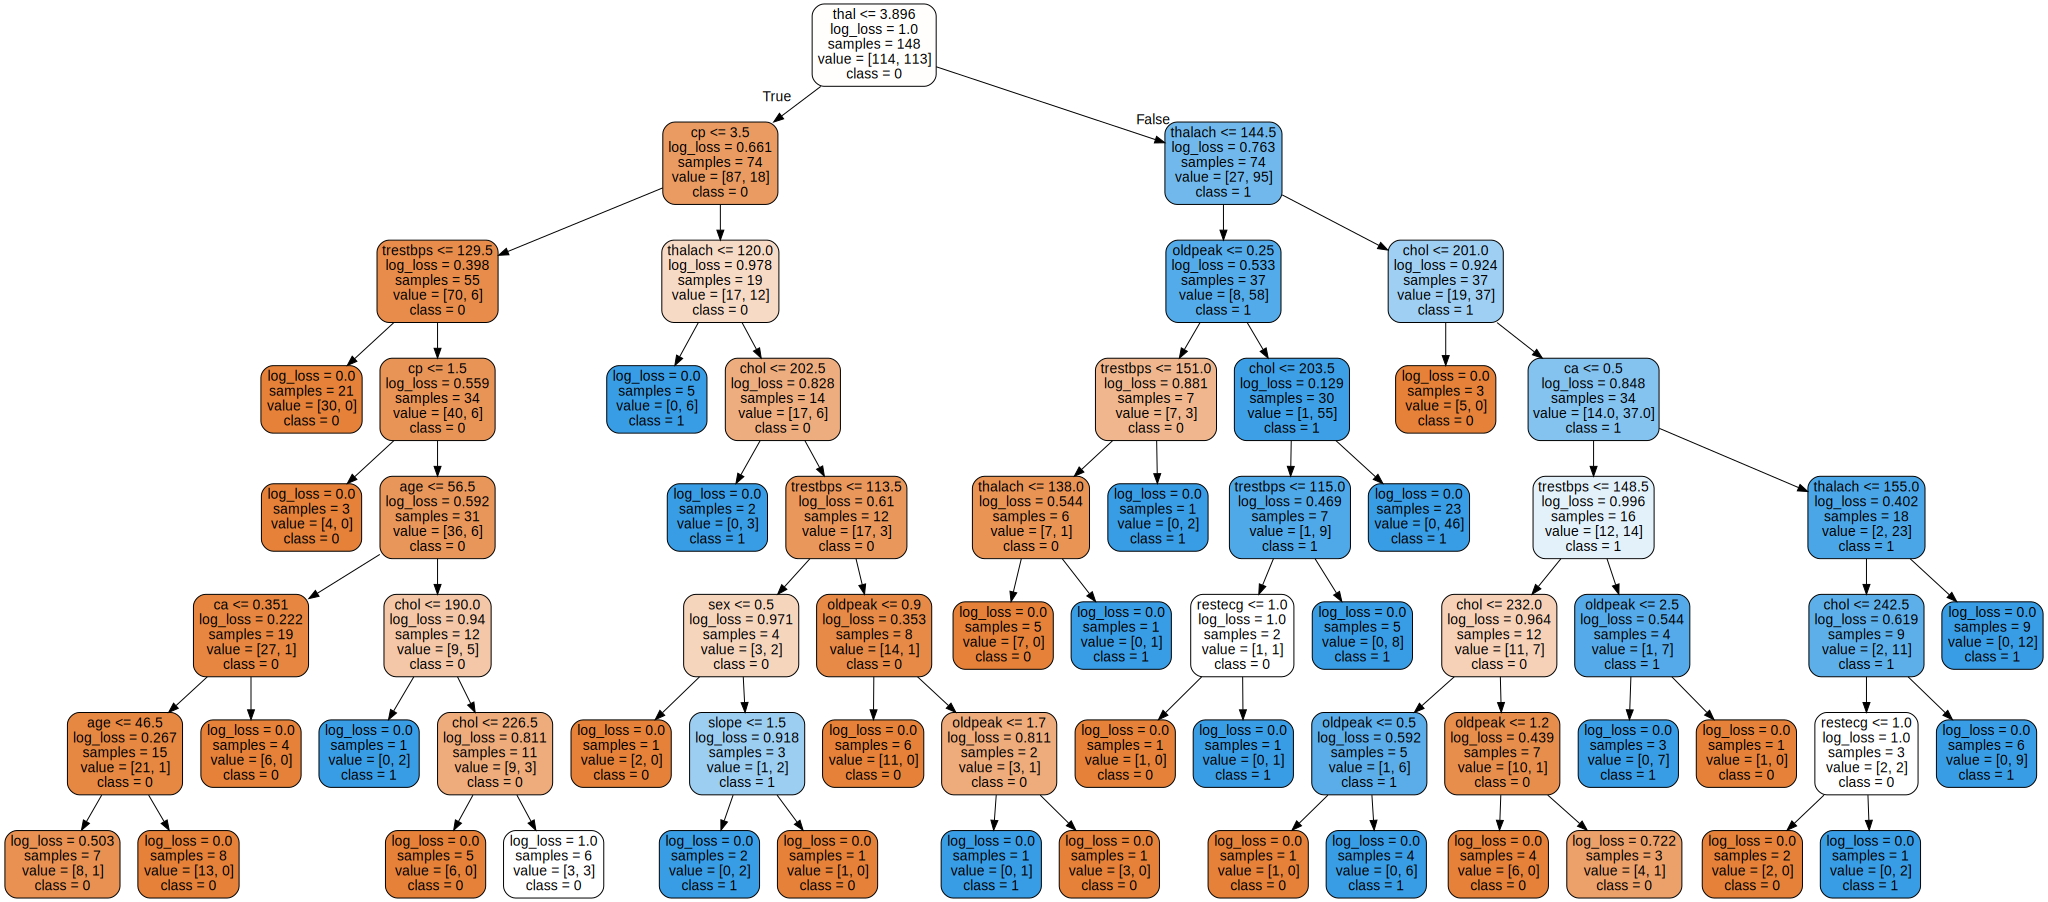

In [45]:
plot_data = export_graphviz(gridcv3.best_estimator_.estimators_[0],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Hyperparameters of the best model that chosen are criterion, max_depth and max_features

# Best model for random forest are criterion='log_loss', max_depth=7, max_features=3